In [1]:
# Source: https://github.com/ishaberry/Covid19Canada
# Source: https://resources-covid19canada.hub.arcgis.com/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Covid Confirmed Cases
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'
file = '04-10-2020.csv'
df = pd.read_csv(url+file)

# Summary by province
df_prov = pd.read_csv('data/canada/Provincial Summaries.csv')
df_prov

# Testing Numbers
path = 'data/Covid19Canada-master/'
df_testing = pd.read_csv(path + 'testing_cumulative.csv')
#Formating Dates, Sorting Values and Selecting Fields
df_testing['date_testing'] = pd.to_datetime(df_testing['date_testing'], format = "%d-%m-%Y")
df_testing.sort_values(['province','date_testing'], ascending=True, inplace = True)
df_testing.reset_index(inplace=True)
df_testing = df_testing[['date_testing', 'province', 'cumulative_testing']]

In [2]:
can = df[df['Country_Region'] == 'Canada'].sort_values('Confirmed', ascending=False)
can[['Province_State', 'Confirmed']][:-2]

,Province_State,Confirmed
2733,Quebec,11677
2729,Ontario,6237
2671,Alberta,1451
2679,British Columbia,1370
2728,Nova Scotia,407
2740,Saskatchewan,285
2723,Newfoundland and Labrador,239
2716,Manitoba,230
2720,New Brunswick,112
2730,Prince Edward Island,25


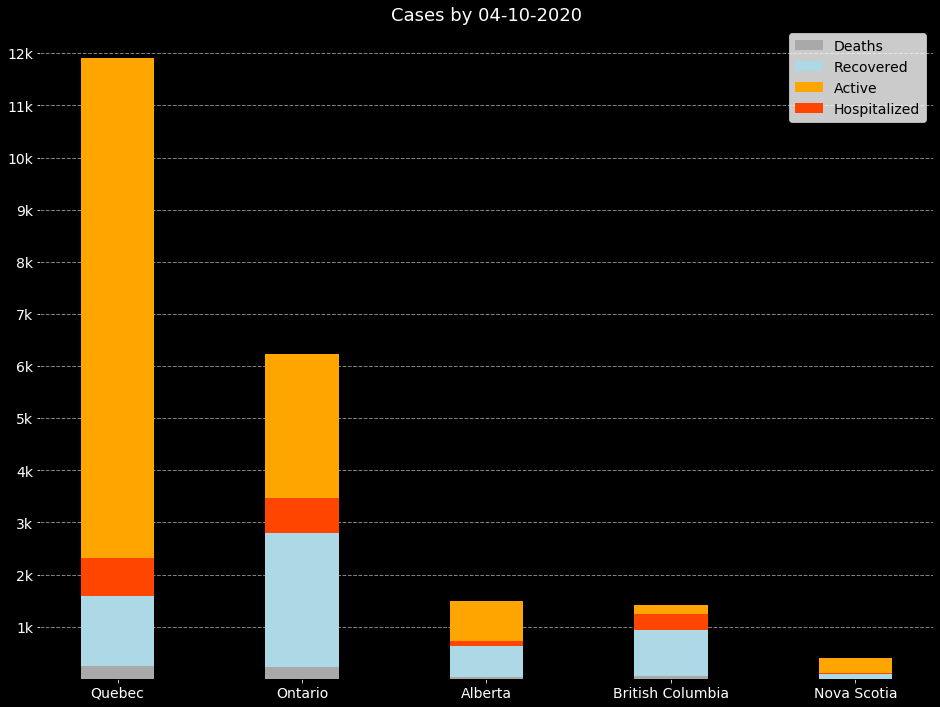

In [9]:
#provinces = ['British Columbia', 'Alberta', 'Quebec', 'Ontario', 'Nova Scotia']
provinces = ['Quebec', 'Ontario', 'British Columbia', 
             'Alberta', 'Nova Scotia']
fig, ax = plt.subplots(1, figsize=(16,12), facecolor='black')

#can = df[df['Country_Region'] == 'Canada'].sort_values('Confirmed', ascending=False)
#can = can[can['Province_State'].isin(provinces)]

can = df_prov[df_prov['English Name'].isin(provinces)].sort_values('Cases', ascending=False)

#plot
plt.bar(x=can['English Name'], height=can['Deaths'], 
        width=0.4, color='darkgrey')

plt.bar(x=can['English Name'], height=can['Recovered'], 
        width=0.4, color='lightblue', 
        bottom = can['Deaths'])

plt.bar(x=can['English Name'], height=can['Active Cases'], 
        width=0.4, color='orange',
        bottom = can['Deaths'] + can['Recovered'])

plt.bar(x=can['English Name'], height=can['Hospitalized'], 
        width=0.4, color='orangered', bottom = can['Deaths'] + can['Recovered'])



#details
plt.xticks(fontsize=14)
yticks = np.arange(1000,12001,1000)
yticks_label =[str(i)[:-3] + 'k' for i in yticks]
plt.yticks(yticks, labels = yticks_label, fontsize=14)
plt.legend(['Deaths', 'Recovered', 'Active', 'Hospitalized'], fontsize = 14)
plt.title('Cases by ' + file[:10], color='white', fontsize=18)

# grid
ax.grid(color='grey', linestyle='dashed', linewidth=1, axis = 'y')
ax.set_axisbelow(True)

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#Colors
ax.set_facecolor('xkcd:black')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')

plt.savefig('pics/overview_canada.png', facecolor='black', edgecolor='none')

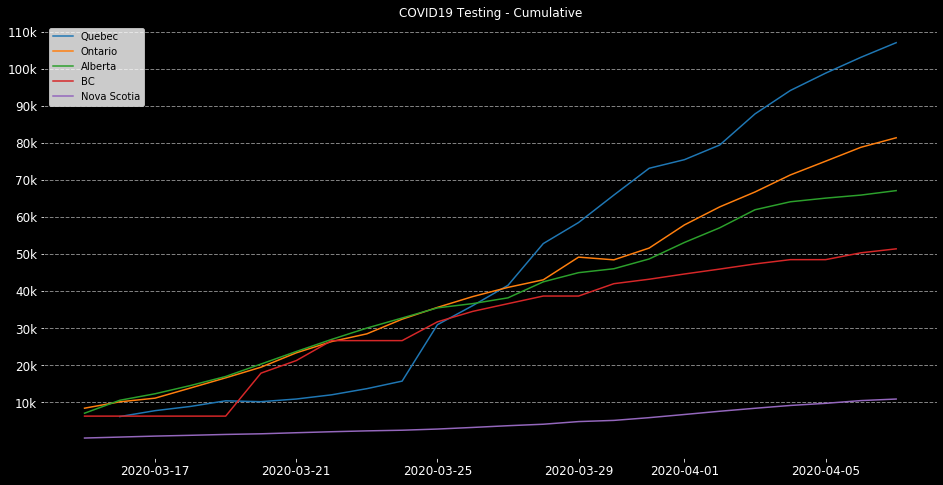

In [6]:
provinces = ['Quebec', 'Ontario', 'Alberta', 'BC', 'Nova Scotia']

fig, ax = plt.subplots(1, figsize=(16,8), facecolor = 'black')

# plots
for province in provinces:
    temp = df_testing[df_testing.province == province]
    plt.plot(temp['date_testing'], temp['cumulative_testing'])

#Details
plt.xticks(fontsize=12)
yticks = np.arange(10000, 110001, 10000)
yticks_label =[str(i)[:-3] + 'k' for i in yticks]
plt.yticks(yticks, fontsize = 12, labels = yticks_label)
plt.legend(provinces)
plt.title('COVID19 Testing - Cumulative', color='white')

# grid
ax.grid(color='grey', linestyle='dashed', linewidth=1, axis = 'y')
ax.set_axisbelow(True)

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#Colors
ax.set_facecolor('xkcd:black')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')

plt.savefig('pics/testing_canada.png', facecolor='black', edgecolor='none')